# Analysis-2 of Covid in India

The prime minister of India ordered a nationwide **lockdown** on the 24th of March 2020. The country has witnessed 4 lockdowns and are now being introduced to major relaxations in many states. The lockdowns ranged from 21-15 days and the dates are:

1. Lockdown-1 : 24th March 2020 (21 days)
2. Lockdown-2 : 15th April 2020 (19 days)
3. Lockdown-3 : 4th May 2020 (15 days)
4. Lockdown-4 : 18th May 2020 (15 days)

The country has been on a lockdown for the past 69 days with certain relaxtions given to states. The below analysis gives a basic analysis on how have the cases have risen and the various other factors.

The analysis of the first 2 lockdowns have been done in another document(<a href="https://github.com/kunallll/Covid-19-India/blob/master/Analysis-India-1.ipynb">Analysis-1</a>) please refer to the link.

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('India_daily.csv')

In [124]:
df.head()

,Date,Daily_confirmed,Daily_deceased,Daily_recovered,Total_confirmed,Total_deceased,Total_recovered
0,30 January,1,0,0,1,0,0
1,31 January,0,0,0,1,0,0
2,01 February,0,0,0,1,0,0
3,02 February,1,0,0,2,0,0
4,03 February,1,0,0,3,0,0


In [125]:
def dateChange(Date):
    dict_month = {
        'January ' : '1',
        'February ' : '2',
        'March ' : '3',
        'April ' : '4',
        'May ' : '5',
        'June ' : '6', 
        'July ' : '7',
        'August ' : '8',
        'September ' : '9',
        'October ' : '10',
        'November ' : '11',
        'December ' : '12'
    }
    
    return "2020" + "-" + dict_month[Date[3:]] + "-" + Date[0:2]
    
df['New_date'] = df['Date'].apply(dateChange)

In [126]:
df.head()

,Date,Daily_confirmed,Daily_deceased,Daily_recovered,Total_confirmed,Total_deceased,Total_recovered,New_date
0,30 January,1,0,0,1,0,0,2020-1-30
1,31 January,0,0,0,1,0,0,2020-1-31
2,01 February,0,0,0,1,0,0,2020-2-01
3,02 February,1,0,0,2,0,0,2020-2-02
4,03 February,1,0,0,3,0,0,2020-2-03


In [127]:
df['New_date'] = pd.to_datetime(df['New_date'])

In [128]:
df_lockdown_3 = df.set_index('New_date').loc['2020-05-03':'2020-05-17']

In [129]:
df_lockdown_3

,Date,Daily_confirmed,Daily_deceased,Daily_recovered,Total_confirmed,Total_deceased,Total_recovered
New_date,,,,,,,
2020-05-03,03 May,2952,140,911,42778,1463,11763
2020-05-04,04 May,3656,103,1082,46434,1566,12845
2020-05-05,05 May,2971,128,1295,49405,1694,14140
2020-05-06,06 May,3602,91,1161,53007,1785,15301
2020-05-07,07 May,3344,104,1475,56351,1889,16776
2020-05-08,08 May,3339,97,1111,59690,1986,17887
2020-05-09,09 May,3175,115,1414,62865,2101,19301
2020-05-10,10 May,4311,112,1669,67176,2213,20970
2020-05-11,11 May,3592,81,1579,70768,2294,22549


## Lockdown-3 (04-05-2020 to 17-05-2020)

The third lockdown was implemented on the 15th of April. At the start of this lockdown, the total number of cases that were reported, the deaths and recoveries in the entire country were:
    1. Cases: 42778
    2. Deaths: 1463
    3. Recoveries: 11763

As the lockdown was announced by the Ministry of Home Affairs, it also decided on providing certain relaxations. All state districts were divided into 3 categories, these were:
    1. Green 
    2. Orange
    3. Red
Red zones are those with high coronavirus cases and a high doubling rate, orange zones are those with comparatively fewer cases and green zones are those without any cases in the past 21 days. Normal movement is permitted in green zones with buses limited to 50 percent capacity. Orange zones would allow only private and hired vehicles but no public transportation. The red zones would remain under lockdown. The zone classification would be revised once a week.

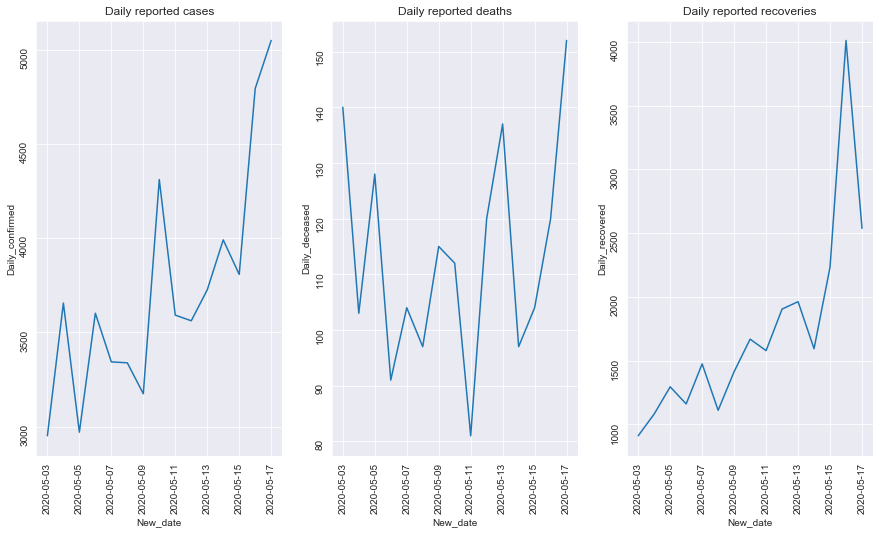

In [130]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,3, figsize=(15,8))

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)

axes[0].set_title('Daily reported cases')
sns.lineplot(x=df_lockdown_3.index, y=df_lockdown_3['Daily_confirmed'], ax=axes[0])
axes[1].set_title('Daily reported deaths')
sns.lineplot(x=df_lockdown_3.index, y=df_lockdown_3['Daily_deceased'], ax=axes[1])
axes[2].set_title('Daily reported recoveries')
sns.lineplot(x=df_lockdown_3.index, y=df_lockdown_3['Daily_recovered'], ax=axes[2])

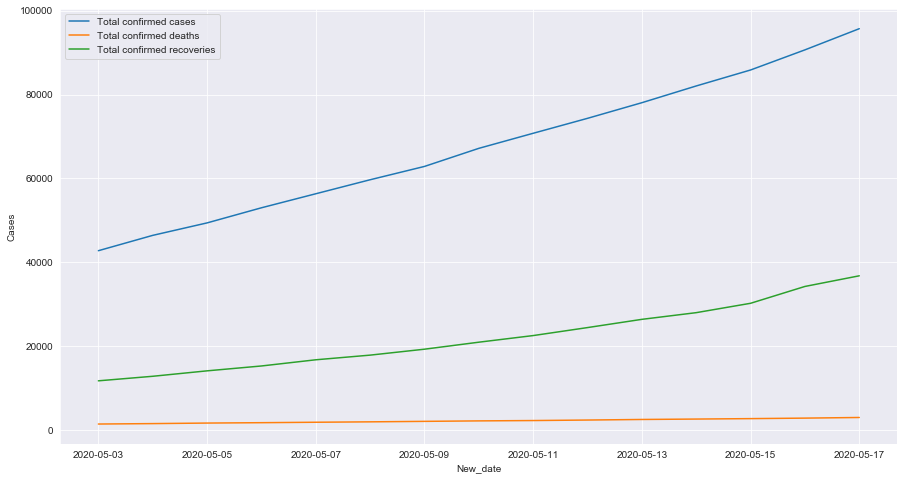

In [131]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df_lockdown_3.index, y=df_lockdown_3['Total_confirmed'], label='Total confirmed cases')
sns.lineplot(x=df_lockdown_3.index, y=df_lockdown_3['Total_deceased'], label='Total confirmed deaths')
sns.lineplot(x=df_lockdown_3.index, y=df_lockdown_3['Total_recovered'], label='Total confirmed recoveries')
plt.ylabel('Cases')
plt.legend()

### At the end of this lockdown, the country had a total of:
    1. Cases: 95698
    2. Deaths: 3024
    3. Recoveries: 36795

The cases were still rising the and an average of 3000-5000 cases were being reported during the lockdown, the death numbers still remained to be low. The recoveries too were rising, they rose from a 1000 to about 4000 recoveries which was seen only the 16th of May. 

## Lockdown-4 (18-05-2020 to 31-05-2020)

This lockdown wasn't very different from the lockdown before this, the only difference was that now the states were given larger role on deciding the red, orange and green zones in their particular state. They were also given more charge on deciding the functioning of various departments under their states. At the start of this lockdown the country had:
    1. Cases: 100326
    2. Deaths: 3155
    3. Recoveries: 39277
India had reached the top 10 countries affected by Covid-19. India did enter the top 10 but it did see a major change in its recoveries after this.   

In [132]:
df_lockdown_4 = df.set_index('New_date').loc['2020-05-18':'2020-05-31']

In [133]:
df_lockdown_4

,Date,Daily_confirmed,Daily_deceased,Daily_recovered,Total_confirmed,Total_deceased,Total_recovered
New_date,,,,,,,
2020-05-18,18 May,4628,131,2482,100326,3155,39277
2020-05-19,19 May,6154,146,3032,106480,3301,42309
2020-05-20,20 May,5720,134,3113,112200,3435,45422
2020-05-21,21 May,6023,148,3131,118223,3583,48553
2020-05-22,22 May,6536,142,3280,124759,3725,51833
2020-05-23,23 May,6667,142,2576,131424,3867,54409
2020-05-24,24 May,7111,156,3285,138537,4023,57694
2020-05-25,25 May,6414,150,3012,144951,4173,60706
2020-05-26,26 May,5907,173,3585,150858,4346,64291


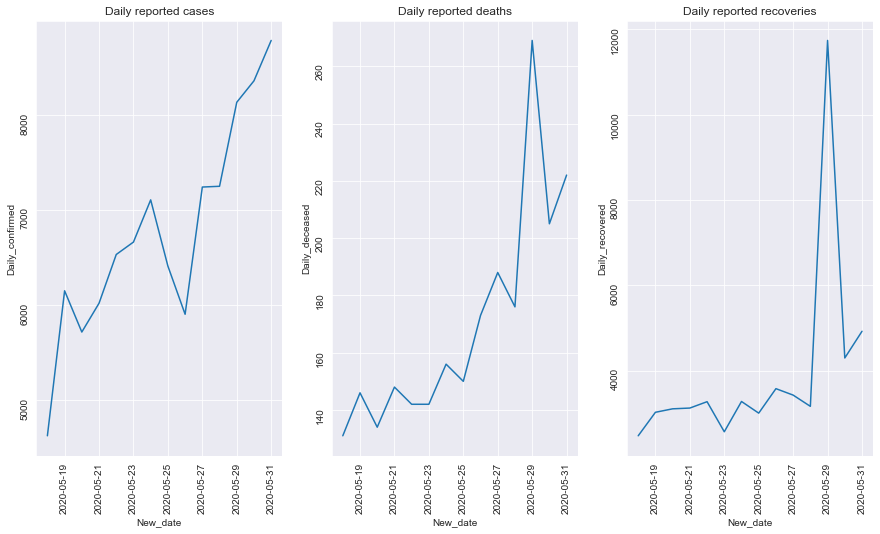

In [134]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,3, figsize=(15,8))

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)

axes[0].set_title('Daily reported cases')
sns.lineplot(x=df_lockdown_4.index, y=df_lockdown_4['Daily_confirmed'], ax=axes[0])
axes[1].set_title('Daily reported deaths')
sns.lineplot(x=df_lockdown_4.index, y=df_lockdown_4['Daily_deceased'], ax=axes[1])
axes[2].set_title('Daily reported recoveries')
sns.lineplot(x=df_lockdown_4.index, y=df_lockdown_4['Daily_recovered'], ax=axes[2])

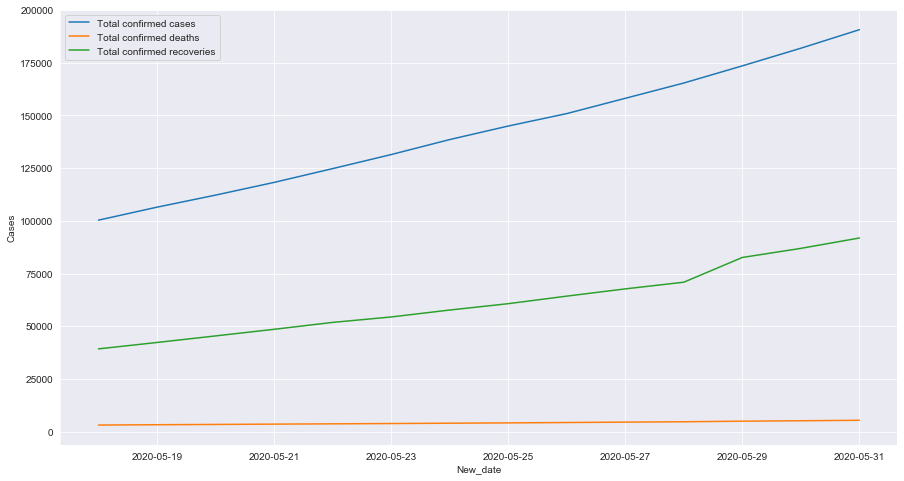

In [135]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df_lockdown_4.index, y=df_lockdown_4['Total_confirmed'], label='Total confirmed cases')
sns.lineplot(x=df_lockdown_4.index, y=df_lockdown_4['Total_deceased'], label='Total confirmed deaths')
sns.lineplot(x=df_lockdown_4.index, y=df_lockdown_4['Total_recovered'], label='Total confirmed recoveries')
plt.ylabel('Cases')
plt.legend()

### As this lockdown came to an end, the country had: 
    1. Cases: 190649
    2. Deaths: 5406
    3. Recoveries: 91862
    
Interestingly, the cases did double up but the recoveries seen in the entire country trippled(**3x**). At the start, the country had, 39277 recoveries and at the end it 91862. We could call it a miracle or a strategy of the Ministry of Home Affiars, anything. This miracle/strategy will be further looked. 

## Timeline of rise in cases, deaths, recoveries (31-01-2020 to 01-06-2020)

The country has been facing the covid crisis for 123 days (till 01-06-2020) and the cases have been certainly rising. The Govt had announced in April that by May 16th there will be no case of covid and there will be zero cases. Looking at the numbers, 16th May had seen the highest number of cases till that date (**4794 cases**). 

This is the graph that represented the Govt claims:

<img src="Zero-cases.png" width="600"></img>

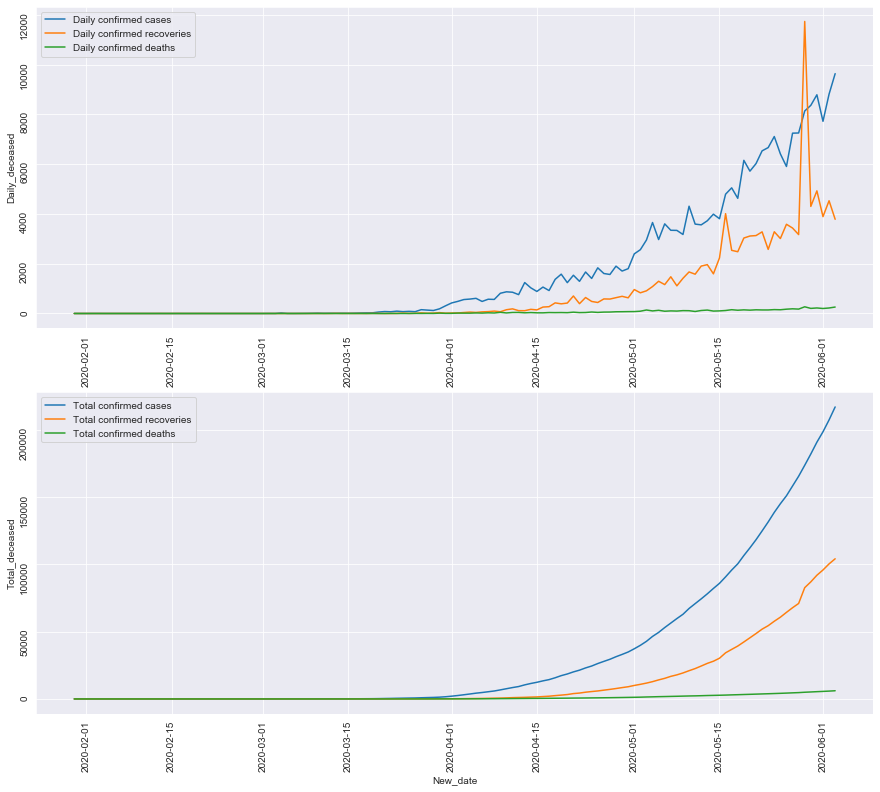

In [136]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,1, figsize=(15,13))

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)

sns.lineplot(x='New_date', y='Daily_confirmed', data=df, ax=axes[0], label='Daily confirmed cases')
sns.lineplot(x='New_date', y='Daily_recovered', data=df, ax=axes[0], label='Daily confirmed recoveries')
sns.lineplot(x='New_date', y='Daily_deceased', data=df, ax=axes[0], label='Daily confirmed deaths')

sns.lineplot(x='New_date', y='Total_confirmed', data=df, ax=axes[1], label='Total confirmed cases')
sns.lineplot(x='New_date', y='Total_recovered', data=df, ax=axes[1], label='Total confirmed recoveries')
sns.lineplot(x='New_date', y='Total_deceased', data=df, ax=axes[1], label='Total confirmed deaths')

In [137]:
one_r = df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_recovered']/df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_confirmed']
two_r = df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_recovered']/df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_confirmed']
three_r =  df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_recovered']/df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_confirmed']
four_r = df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_recovered']/df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_confirmed']

one_d = df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_deceased']/df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_confirmed']
two_d = df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_deceased']/df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_confirmed']
three_d =  df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_deceased']/df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_confirmed']
four_d = df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_deceased']/df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_confirmed']

one_a = ((df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_confirmed'] - 
         (df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_recovered'] + 
         df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_deceased']))/df.set_index('New_date').loc['2020-03-25':'2020-04-14']['Total_confirmed'])
two_a = ((df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_confirmed'] - 
         (df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_recovered'] + 
         df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_deceased']))/df.set_index('New_date').loc['2020-04-15':'2020-05-03']['Total_confirmed'])
three_a = ((df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_confirmed'] - 
         (df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_recovered'] + 
         df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_deceased']))/df.set_index('New_date').loc['2020-05-04':'2020-05-17']['Total_confirmed'])
four_a = ((df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_confirmed'] - 
         (df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_recovered'] + 
         df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_deceased']))/df.set_index('New_date').loc['2020-05-17':'2020-05-31']['Total_confirmed'])

## Recovery, mortality rates:

Leaving behind the policies that were introduced by the Govt, the recovery rate has risen humungously over the period and the Govt is to be applauded. During:
    1. Lockdown-1: Recovery rate - (6%-12%), Death rate - (2%-3%)
    2. Lockdown-2: Recovery rate - (12%-25%), Death rate - (below 5%)
    3. Lockdown-3: Recovery rate - (30%-40%), Death rate - (below 5%)
    4. Lockdown-4: Recovery rate - (40%-50%), Death rate - (below 5%)

Considering the death rate, the rate has been consistently low which is also an achievement to be considered.

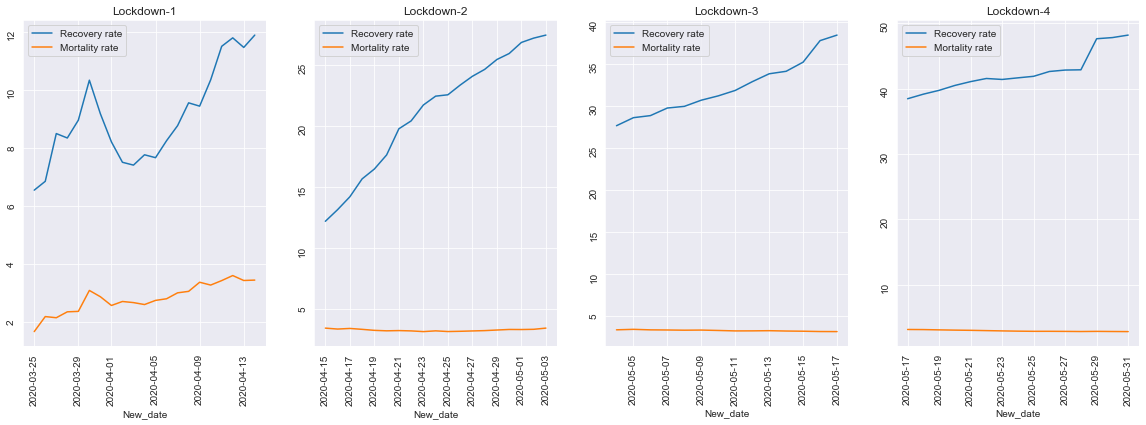

In [138]:
fig,axes = plt.subplots(1,4, figsize=(20,6))

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)
axes[3].tick_params(labelrotation=90)

axes[0].title.set_text('Lockdown-1')
axes[1].title.set_text('Lockdown-2')
axes[2].title.set_text('Lockdown-3')
axes[3].title.set_text('Lockdown-4')

sns.lineplot(x=one_r.index, y=one_r.values*100, ax=axes[0], label='Recovery rate')
sns.lineplot(x=one_d.index, y=one_d.values*100, ax=axes[0], label='Mortality rate')

sns.lineplot(x=two_r.index, y=two_r.values*100, ax=axes[1], label='Recovery rate')
sns.lineplot(x=two_d.index, y=two_d.values*100, ax=axes[1], label='Mortality rate')

sns.lineplot(x=three_r.index, y=three_r.values*100, ax=axes[2], label='Recovery rate')
sns.lineplot(x=three_d.index, y=three_d.values*100, ax=axes[2], label='Mortality rate')

sns.lineplot(x=four_r.index, y=four_r.values*100, ax=axes[3], label='Recovery rate')
sns.lineplot(x=four_d.index, y=four_d.values*100, ax=axes[3], label='Mortality rate')

## Active, Recovered, Deceased (Mean % of the rates)

([<matplotlib.patches.Wedge at 0x18584ab49c8>,
 [Text(-0.1569123375766352, 1.088750898193079, 'Active cases'),
  Text(0.05522617523587768, -1.0986127932847025, 'Recovery rate'),
  Text(1.0952557632899051, -0.10205299104018047, 'Mortality rate')],
 [Text(-0.08558854776907374, 0.5938641262871339, '54.56'),
  Text(0.03012336831047873, -0.5992433417916558, '42.49'),
  Text(0.5974122345217664, -0.05566526784009843, '2.96')])

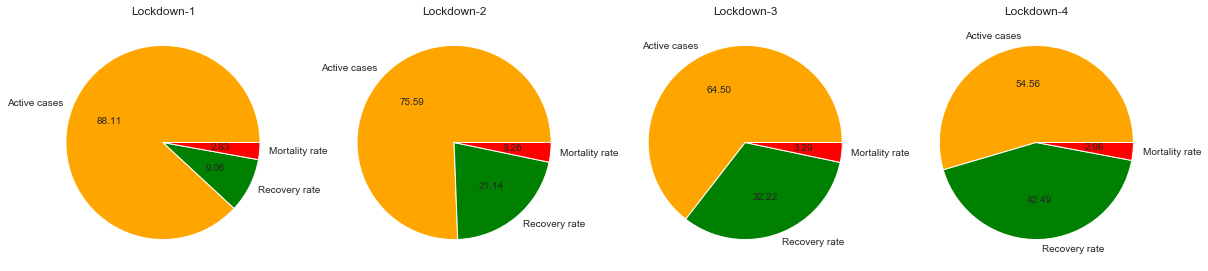

In [139]:
fig,axes = plt.subplots(1,4, figsize=(20,6))

clrs = ['Orange', 'Green', 'Red']
labels = ['Active cases', 'Recovery rate', 'Mortality rate']

axes[0].title.set_text('Lockdown-1')
axes[1].title.set_text('Lockdown-2')
axes[2].title.set_text('Lockdown-3')
axes[3].title.set_text('Lockdown-4')

axes[0].pie([one_a.mean(), one_r.mean(), one_d.mean()], autopct='%.2f', colors=clrs, labels=labels)
axes[1].pie([two_a.mean(), two_r.mean(), two_d.mean()], autopct='%.2f', colors=clrs, labels=labels)
axes[2].pie([three_a.mean(), three_r.mean(), three_d.mean()], autopct='%.2f', colors=clrs, labels=labels)
axes[3].pie([four_a.mean(), four_r.mean(), four_d.mean()], autopct='%.2f', colors=clrs, labels=labels)

# Results: 

After 123 days of the covid crisis and a 69 day major lockdown with certain relaxations, the Govt had decided to slowly openning up things in the country. The lockdown-5 or unlock-1, started from the 1st June. Various state Govts still decided on continuing with the lockdown (till 31st June). The Centre Govt decided to give the states the power to decide on how would they want to open up their states. 

One thing that did and would also catch our eyes is the massive recovery rates seen in India. Obviously the country had been seeing certain rise in the recovery rates, but a major rise was seen in the recoveries. On the 9th of May, the Ministry of Home Affairs had announced their new guidlines for the discharging Covid patients. These are: 

- Mild/very mild/pre-symptomatic cases: According to the government notification, patients who are in a COVID Care Facility will be put under a regular temperature and pulse oximetry monitoring. The patient can be discharged after 10 days (considering from the day symptoms appeared) if they did not have any fever for 3 days. It is to note that before the discharge, COVID-19 test (RT-PCR) will not be performed. The government further informed that before the discharge, if patients witness any dip in oxygen saturation (below 95 per cent), they will be moved to a Dedicated COVID Health Centre (DCHC). 
- Moderate cases admitted to DCHC (Oxygen beds): In this case, the criteria is further divided into two categories. In both the categories, no RT-PCR test will be done before discharge.

The next thing to be noticed is the mortality rate has been as low as 3%. Countries like UK, Spain, Italy, Germany, which have cases close to that of India, they have a mortality rate of 14%, 9%, 14% and 4%, India is still low. 

India is at the 7th position in terms of number of cases, and the it is expected to see a big spike in cases by July. The lockdown is now completely eased and with the allowance of interstate movement the public would be more prone to covid. 

The one place where India still lacks is it's inadequate testing. India has tested 44,41,930 samples so far, which makes upto only a 0.4% of its population. 

## References:

1. https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_India
2. https://www.indiatoday.in/news-analysis/story/health-ministry-covid19-pandemic-case-prediction-graph-1678917-2020-05-17
3. https://www.financialexpress.com/lifestyle/health/covid-19-recovery-govt-issues-new-guidelines-for-discharging-patients-check-details/1953231/